In [33]:
# EXERCISE 8
import numpy as np
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
linearSVC=LinearSVC(tol=0.0001, C=1.0)
linearSVC.fit(X_scaled,y)
print(linearSVC.score(X_scaled,y))

SVC=LinearSVC(tol=0.0001, C=1.0)
SVC.fit(X_scaled,y)
print(SVC.score(X_scaled,y))

1.0
1.0


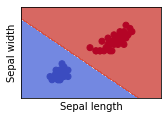

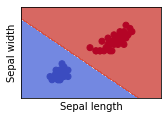

In [44]:
# create a mesh to plot in
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))


for i, clf in enumerate((linearSVC, SVC)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Put the result into a color plot
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

In [55]:
# EXERCISE 9
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, cache=True, return_X_y=True)

In [56]:
np.max(X)

255.0

In [57]:
model = LinearSVC(C=1.0, multi_class='ovr')
model.fit(X, y)
print(model.score(X,y))

0.8740428571428571


/home/gpachitariu/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
